<a href="https://colab.research.google.com/github/jpengtelecom/Lista-1_21_03_2024/blob/main/TRABALHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Conheça o Colab</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>&#40;Novidade&#41; Teste a API Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Se você já conhece bem o Colab, confira este vídeo para saber mais sobre as tabelas interativas, a visualização do histórico de código executado e o Palette de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  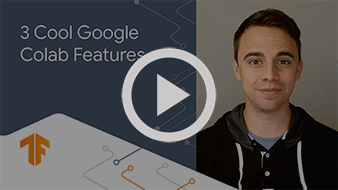
  </a>
</center>

<div class="markdown-google-sans">
  <h2>O que é o Colab?</h2>
</div>

O Colab, ou "Colaboratory", permite escrever e executar Python no navegador e conta com o seguinte:
- Nenhuma configuração necessária
- Acesso a GPUs sem custo financeiro
- Compartilhamento fácil

Você pode ser um <strong>estudante</strong>, um <strong>cientista de dados</strong> ou um <strong>pesquisador de IA</strong>, o Colab pode facilitar seu trabalho. Assista ao vídeo <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introdução ao Colab</a> para saber mais ou simplesmente comece a usá-lo abaixo!

<div class="markdown-google-sans">

## <strong>Vamos começar</strong>
</div>

O documento que você está lendo não é uma página da Web estática, mas sim um ambiente interativo chamado <strong>notebook Colab</strong> que permite escrever e executar código.

Por exemplo, aqui está uma <strong>célula de código</strong> com um breve script Python que calcula um valor, armazena-o em uma variável e imprime o resultado:

In [124]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Para executar o código na célula acima, clique nela e depois pressione o botão Play à esquerda do código ou use o atalho do teclado "Command/Ctrl+Enter". Para editar o código, basta clicar na célula e começar a editar.

As variáveis definidas em uma célula podem ser usadas mais tarde em outras células:

In [125]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Os notebooks do Colab permitem combinar <strong>código executável</strong> e <strong>rich text</strong> em um só documento, além de <strong>imagens</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> e muito mais. Quando você cria seus próprios notebooks do Colab, eles são armazenados na sua conta do Google Drive. É possível compartilhar os notebooks do Colab facilmente com colegas de trabalho ou amigos e permitir que eles façam comentários ou até editem o documento. Para saber mais, consulte a <a href="/notebooks/basic_features_overview.ipynb">Visão Geral do Colab</a>. Para criar um novo bloco do Colab, use o menu Arquivo acima ou acesse o seguinte: <a href="http://colab.research.google.com#create=true">criar um novo bloco do Colab</a>.

Os notebooks do Colab são notebooks do Jupyter hospedados no Colab. Para saber mais sobre o projeto Jupyter, acesse <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciência de dados
</div>

Com o Colab, você pode aproveitar todo o potencial das conhecidas bibliotecas Python para analisar e ver dados. A célula de códigos abaixo usa <strong>numpy</strong> para gerar dados aleatórios e <strong>matplotlib</strong> para visualizá-los. Para editar o código, basta clicar na célula e começar a editar.

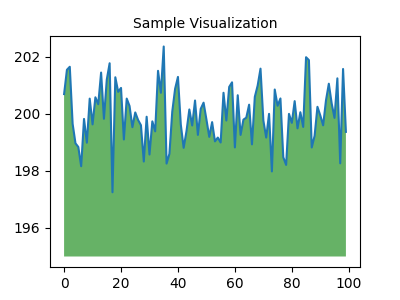

In [126]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

É possível importar para os notebooks do Colab os dados da sua conta do Google Drive, como planilhas. Também é possível importar do GitHub e de muitas outras fontes. Para saber mais sobre como importar dados e como o Colab pode ser usado para a ciência de dados, consulte o link abaixo em <a href="#working-with-data">Como trabalhar com dados</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Com o Colab, é possível importar um conjunto de dados de imagem, treinar um classificador de imagens dentro dele e avaliar o modelo, tudo com apenas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">algumas linhas de código</a>. Os notebooks do Colab executam código dos servidores em nuvem do Google. Isso significa que você pode tirar proveito da potência de hardware do Google, como <a href="#using-accelerated-hardware">GPUs e TPUs</a>, independentemente da potência da sua máquina. Você só precisa de um navegador.

O Colab é usado amplamente pela comunidade de machine learning, para aplicações como:
- Começar a usar o TensorFlow
- Desenvolvimento e treinamento de redes neurais
- Experimentos com TPUs
- Divulgação de pesquisas em IA
- Criação de tutoriais

Para acessar notebooks do Colab que demonstram aplicações de machine learning, consulte os <a href="#machine-learning-examples">exemplos de machine learning</a> abaixo.

<div class="markdown-google-sans">

## Mais recursos

### Como trabalhar com Notebooks no Colab

</div>

- [Visão geral do Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guia sobre Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependências](/notebooks/snippets/importing_libraries.ipynb)
- [Salvar e carregar notebooks no GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulários interativos](/notebooks/forms.ipynb)
- [Widgets interativos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Como trabalhar com dados
</div>

- [Carregar dados: Drive, Planilhas e Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualizar dados](/notebooks/charts.ipynb)
- [Começar a usar o BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de machine learning

<div>

Estes são alguns notebooks do curso on-line do Google sobre machine learning. Acesse o <a href="https://developers.google.com/machine-learning/crash-course/">site do curso completo</a> para saber mais.
- [Introdução ao Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regressão linear com tf.keras e uso de dados sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Usar hardware acelerado
</div>

- [TensorFlow com GPUs](/notebooks/gpu.ipynb)
- [TensorFlow com TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Exemplos em destaque

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: use o kit de ferramentas para IA conversacional do Nvidia NeMo para trocar uma voz em um fragmento de áudio por uma gerada por computador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Treinar novamente um classificador de imagens</a>: crie um modelo do Keras com base em um classificador de imagens pré-treinado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classificação de texto</a>: classifique avaliações de filmes do IMDB como <em>positivas</em> ou <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferência de estilo</a>: use o aprendizado profundo para transferir o estilo entre imagens.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Perguntas e respostas sobre o codificador de frases universais multilíngue</a>: use um modelo de machine learning para responder a perguntas do conjunto de dados SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolação de vídeo</a>: preveja o que aconteceu em um vídeo entre o primeiro e o último frames.


In [127]:
!pip install matlab
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


<ipython-input-161-fb07d2f7abb9>:62: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.axis([0,110,1e-6,1])


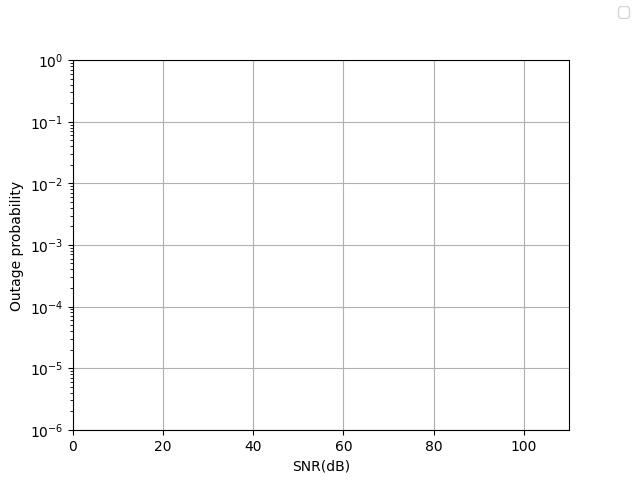

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import special
from scipy import signal
from scipy.stats import nakagami
import random

# Constants
N = 10000
f = 300e9  # THz carrier frequency (Hz)
G = 10e4 # Antenna gains (40dBi)
c = 3e8
k = 3.18e-4  # Molecular absorption coefficient (per meter)
d1 = 5  # Distance from source to RIS (m)
d2 = 25  # Distance from RIS to destination (m)
noise_floor = 3.9811e-11   # Noise floor (-74dBm)
bandwidth = 10e9  # Channel bandwidth (Hz)


alpha_1 = 2  # Alpha parameter for path 1
mu_1 = 1  # Mu parameter for path 1
alpha_2 = 2  # Alpha parameter for path 2
mu_2 = 2  # Mu parameter for path 2

calculate_path_gain = ((c*G)/ (4*np.pi*f*(d1+d2)))*np.exp(-0.5*k* (d1+d2))





d = d1+d2
media=d**(-alpha_2)
lambda1=1/media


R=2 #Limiar 3db
count=0
i=0
j=0
OP1=[]
OP2=[]
OP4=[]
N0=1
for j in np.arange(65,111,1):
    count=0
    plin=10**(j/10)
    r2 = np.sqrt(media)*nakagami.rvs(2, size=N)

    Prob2 = np.sum(np.log2(1 + (r2**2*plin/N0)) < R) / N
    print(Prob2)
    OP2 = np.append(OP2, Prob2)




Pdb=np.arange(65,111,1)

plt.semilogy(Pdb,OP2,'rx--')

plt.grid()
plt.axis([0,110,1e-6,1])
plt.xlabel('SNR(dB)')
plt.ylabel('Outage probability')
plt.figlegend([])
plt.show()